In [1]:
# pip3 install wheel
# pip3 install pandas
# pip3 install -U scikit-learn scipy matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

import time
start_time = int(round(time.time() * 1000))
start_time_hyb = int(round(time.time() * 1000))

In [3]:
# start_time = int(round(time.time() * 1000))
# amazon_ratings = pd.read_csv('/Users/priya/Desktop/tutorials/ratings_Beauty.csv')
# amazon_ratings = amazon_ratings.dropna()
# amazon_ratings.head()

In [4]:
new_ratings = pd.read_csv('/Users/priya/Desktop/tutorials/recommendation_dataset.csv')
new_ratings = new_ratings.dropna()
new_ratings.head()

,Unnamed: 0,UserId,ProductId,Rating,title,image,asin
0,0,ABVND860D55AJ,7535842801,5.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
1,1,A26TLFFBFPEOKJ,7535842801,4.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
2,2,A2Q8QWVIZM213M,7535842801,3.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
3,3,A3C5DYTUXUCL0S,7535842801,5.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
4,4,A3DNSZT2HIB30J,7535842801,5.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801


In [5]:
new_ratings.shape

(18027, 7)

In [6]:
popular = pd.DataFrame(new_ratings.groupby('title')['Rating'].count())
most_popular1 = popular.sort_values('Rating', ascending=False)
most_popular1.head(10)

,Rating
title,
"Helen of Troy 1514 Brush Iron, White, 1 1/2 Inches Barrel",1068
"FOONEE Rhinestones Nail Art Gems Mixed Colours Shapes in Case (2mm,3000pcs)",943
"NARS Blush, Taj Mahal",710
"Eyelash Growth Serum - 100% Natural Eyelash Eyebrow Enhancer Lash Growth Serum give you Longer and Thicker Eyelash, Fuller and Healthier Eyebrow - 3ml - No more False Eyelashes &amp; Eyebrow Tattooing",502
"Poppy Austin Pure Argan Oil for Hair &amp; Skin - Vegan, Cruelty-Free &amp; Organic Finest Grade, 2 oz",379
GiGi Mini Pro Hair Removal Waxing Kit,307
Water-Rosewater Heritage Store 8 oz Liquid,280
Alpha Hydrox AHA Souffle Soothing Anti-Wrinkle 1.6 oz.,185
Wilkinson Sword Double Edge Razor Blade Refills for Men - 5 Count,183


In [7]:
rank = []
for i in range(len(most_popular1)):
    rank.append(i+1)
most_popular1['Rank']=rank
most_popular1

,Rating,Rank
title,,
"Helen of Troy 1514 Brush Iron, White, 1 1/2 Inches Barrel",1068,1
"FOONEE Rhinestones Nail Art Gems Mixed Colours Shapes in Case (2mm,3000pcs)",943,2
"NARS Blush, Taj Mahal",710,3
"Eyelash Growth Serum - 100% Natural Eyelash Eyebrow Enhancer Lash Growth Serum give you Longer and Thicker Eyelash, Fuller and Healthier Eyebrow - 3ml - No more False Eyelashes &amp; Eyebrow Tattooing",502,4
"Poppy Austin Pure Argan Oil for Hair &amp; Skin - Vegan, Cruelty-Free &amp; Organic Finest Grade, 2 oz",379,5
...,...,...
Peanuts Be My Valentine Raspberry Flavored Lip Balm,1,2354
Donner Women's Summer Printed Casual Beach Dress Free Size (Light Blue),1,2355
Pecksniff's Hand Wash Duo in Gardenia &amp; White Peach 2 Pack by Pecksniffs,1,2356




Time taken for execution of Phase 1 : 216 milliseconds


<AxesSubplot:xlabel='title'>

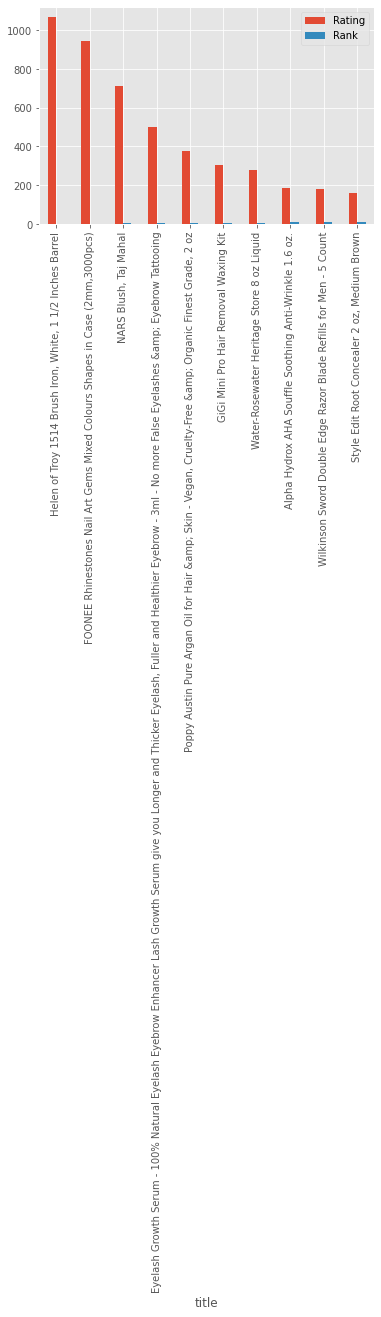

In [8]:
computational_time = int(round(time.time() * 1000)) - start_time
print('\n\nTime taken for execution of Phase 1 :' ,computational_time, 'milliseconds')

most_popular1.head(10).plot(kind = "bar")


In [9]:
# PHASE - (ii)


start_time = int(round(time.time() * 1000))

In [10]:
amazon_ratings1 = new_ratings.head(10000)
amazon_ratings1

,Unnamed: 0,UserId,ProductId,Rating,title,image,asin
0,0,ABVND860D55AJ,7535842801,5.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
1,1,A26TLFFBFPEOKJ,7535842801,4.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
2,2,A2Q8QWVIZM213M,7535842801,3.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
3,3,A3C5DYTUXUCL0S,7535842801,5.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
4,4,A3DNSZT2HIB30J,7535842801,5.0,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],7535842801
...,...,...,...,...,...,...,...
9995,9995,AM26IDIWFJZIQ,B004018VP6,5.0,Style Sexy Hair Dimension Rough &amp; Ready 4 ...,['https://images-na.ssl-images-amazon.com/imag...,B004018VP6
9996,9996,A8L32T5430WI1,B004018VP6,5.0,Style Sexy Hair Dimension Rough &amp; Ready 4 ...,['https://images-na.ssl-images-amazon.com/imag...,B004018VP6
9997,9997,A3RX8ATBKOCNAT,B004018VP6,5.0,Style Sexy Hair Dimension Rough &amp; Ready 4 ...,['https://images-na.ssl-images-amazon.com/imag...,B004018VP6
9998,9998,A58SNE8DBHUSI,B004018VP6,4.0,Style Sexy Hair Dimension Rough &amp; Ready 4 ...,['https://images-na.ssl-images-amazon.com/imag...,B004018VP6


In [11]:
# amazon_ratings = pd.read_csv('/Users/priya/Desktop/tutorials/ratings_Beauty.csv')
# amazon_ratings = amazon_ratings.dropna()
# amazon_ratings1 = amazon_ratings.head(10000)
# amazon_ratings1

In [12]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='title', fill_value=0)
ratings_utility_matrix.head()

title,"Alba Botanica Hawaiian, Papaya Mango Exfoliating Body Wash, 7 Ounce (Pack of 3)","Alterna Hemp Sheer Pomade, 2-Ounce Jar","AquaTica Organic Botanical Night Cream with Caviar Extract, Reishi and CoQ10, 2oz","Aveda Damage Remedy Conditioner, 6.7-Ounce Tube",Avon Naturals Cranberry &amp; Cinnamon Bath &amp; Body Collection,Back to Basics Vanilla Plum Shampoo 11.5 oz (Pack of 2),Bare Escentuals Sephora Exclusive Get Started Kit ($174 VALUE for $60) Deep,Barry M Lip Paint - (TMLP) Touch of Magic.,Beauticontrol Show of Hands Instant Manicure 10 Oz.,Black Orchid Voile De Fleur Eau De Toilette Spray,...,bliss Spa Limted Edition Beachy Clean Summer Getaway Set,"c. Booth Breathe Free Body Wash, 16 oz",derma e derma e Eye Bright Dark Circle Creme,"essie nail polish, cuticle care, primers and finishers",ibd Builder Gel - Clear - 0.5oz / 14g,makeup mirror,men-u Create and Shape (100ml),obey your body nail care kit la-famme,"pHisoderm Clear Confidence Body Wash, 4 Way, 12 fl oz (354 ml)",q
UserId,,,,,,,,,,,,,,,,,,,,,
A03194882L8Z9JVQNYFNL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A04521841QFFSU37OMP5V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0586024117JB9JS5L6DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A06214032V4MNWBNTWLS8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A07386331ILFRMHFJAQN3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
# ratings_utility_matrix.head()

In [14]:
ratings_utility_matrix.shape

(8109, 906)

In [15]:
X = ratings_utility_matrix.T
X.head()

UserId,A03194882L8Z9JVQNYFNL,A04521841QFFSU37OMP5V,A0586024117JB9JS5L6DG,A06214032V4MNWBNTWLS8,A07386331ILFRMHFJAQN3,A100IC7JRCQDUD,A100WAJB4KHLFP,A1027EV8A9PV1O,A1029CAC8JRPJX,A102KTENR1BDV3,...,AZRYWIRF1K4HP,AZS2XRYMKINX3,AZS3D6VNL2GZ9,AZTZ7SIIRXLXE,AZUXYL8PDDSAR,AZW9UD7Z7J0WL,AZXGPM8EKSHE9,AZY5PMD5ZON9B,AZYV6J88DT5CZ,AZZ20OTK4NR3V
title,,,,,,,,,,,,,,,,,,,,,
"Alba Botanica Hawaiian, Papaya Mango Exfoliating Body Wash, 7 Ounce (Pack of 3)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Alterna Hemp Sheer Pomade, 2-Ounce Jar",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"AquaTica Organic Botanical Night Cream with Caviar Extract, Reishi and CoQ10, 2oz",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Aveda Damage Remedy Conditioner, 6.7-Ounce Tube",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Avon Naturals Cranberry &amp; Cinnamon Bath &amp; Body Collection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# res = X.loc[X['A1WMRR494NWEWV'] > 1]
# res['A1WMRR494NWEWV']
# X.loc[X['Alba Botanica Hawaiian, Papaya Mango Exfoliating Body Wash, 7 Ounce (Pack of 3)	'] > 1]

In [17]:
X.shape

(906, 8109)

In [18]:
X1 = X

In [19]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
print(decomposed_matrix.shape)
#decomposed_matrix[0]


(906, 10)


In [20]:
correlation_matrix = np.corrcoef(decomposed_matrix)
print(correlation_matrix.shape)
print(correlation_matrix)
#correlation_matrix[0]

(906, 906)
[[ 1.          0.51102923 -0.91306631 ... -0.72355251 -0.73456756
  -0.97296777]
 [ 0.51102923  1.         -0.70867385 ... -0.19312951 -0.02540679
  -0.55182713]
 [-0.91306631 -0.70867385  1.         ...  0.49797192  0.66234573
   0.84673193]
 ...
 [-0.72355251 -0.19312951  0.49797192 ...  1.          0.52891227
   0.7461486 ]
 [-0.73456756 -0.02540679  0.66234573 ...  0.52891227  1.
   0.57994351]
 [-0.97296777 -0.55182713  0.84673193 ...  0.7461486   0.57994351
   1.        ]]


In [21]:
i = X.index[99]

print(i)
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

Alfa Vitamins Breast Firming Cream 4 oz Redefine Reaffirms Anti Aging


99

In [22]:
correlation_product_ID = correlation_matrix[product_ID]

recommend1=[]
co=[]
for j in range(len(correlation_product_ID)):
    if(correlation_product_ID[j] > 0.90 and product_names[j] is not i):
        recommend1.append(product_names[j])
        co.append(round(correlation_product_ID[j],3))

data = {'title': recommend1, 'correlation_coefficient': co} 
collaborative_recommendation = pd.DataFrame(data)


collaborative_recommendation = collaborative_recommendation.sort_values('correlation_coefficient', ascending=False)
print(collaborative_recommendation.head(10))



computational_time = int(round(time.time() * 1000)) - start_time
print('\n\nTime taken for execution of phase 2:' ,computational_time, 'milliseconds')


                                                title  correlation_coefficient
1           9 Piece Smart Cover-Up Starter Kit (Dark)                    0.989
2     APLUS Ozone Lace Front Wig 008SE- Color #613/27                    0.975
9   LaRocca Skincare Lash Lengthening Treatment-0....                    0.964
12                Niven Morgan Blue Travel Hand Cream                    0.962
19   Urban Apothecary Chisel Taklon Angle Liner Brush                    0.961
16                                 Petal Gel Brush #6                    0.943
17          Save My Face La Petite White Satin Pillow                    0.941
8   Johnson's Calming Lotion With Soothing Lavende...                    0.939
15  Pedisavers Individual Toes Anklet Pedicure Soc...                    0.936
0    Ceramic Silk 1 1/4&quot; Straightener Kit Jhe...                    0.936


Time taken for execution of phase 2: 2047 milliseconds


In [23]:
#Phase - iii

d1 = most_popular1
d2 = collaborative_recommendation.head(10)
t = pd.merge(d1, d2, how ='inner', on =['title','title']) 
t = t.sort_values(["correlation_coefficient", "Rank"], ascending = (False, True))
t

,title,Rating,Rank,correlation_coefficient
1,9 Piece Smart Cover-Up Starter Kit (Dark),5,581,0.989
6,APLUS Ozone Lace Front Wig 008SE- Color #613/27,1,1582,0.975
7,LaRocca Skincare Lash Lengthening Treatment-0....,1,1959,0.964
8,Niven Morgan Blue Travel Hand Cream,1,2269,0.962
5,Urban Apothecary Chisel Taklon Angle Liner Brush,1,1563,0.961
9,Petal Gel Brush #6,1,2299,0.943
3,Save My Face La Petite White Satin Pillow,3,807,0.941
0,Johnson's Calming Lotion With Soothing Lavende...,12,249,0.939
2,Ceramic Silk 1 1/4&quot; Straightener Kit Jhe...,3,785,0.936
4,Pedisavers Individual Toes Anklet Pedicure Soc...,2,972,0.936


In [24]:
computational_time_hyb = int(round(time.time() * 1000)) - start_time_hyb
computational_time_hyb

2816